In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_woods

maze = gym.make('Woods1-v0')
print("This is how maze looks like:")
situation = maze.reset()
maze.render()


This is how maze looks like:

□ □ □ □ □
X □ □ □ □
■ ■ $ □ □
■ ■ ■ □ □
■ ■ ■ □ □


In [3]:
from lcs.agents.xcs import XCS, Configuration
from utils.xcs_utils import *

cfg = Configuration(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_metrics)


In [4]:
df = avg_experiment(maze=maze,
                         cfg=cfg,
                         number_of_tests=1,
                         explore_trials=1000,
                         exploit_trials=500)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 1, 'reward': 1000.0, 'perf_time': 0.00047239999999959537, 'population': 8, 'numerosity': 8, 'average_specificity': 12.75, 'fraction_accuracy': 1.0}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 2, 'reward': 1504.1548361035784, 'perf_time': 0.006607600000000602, 'population': 264, 'numerosity': 1603, 'average_specificity': 10.123518402994385, 'fraction_accuracy': 2.0223529468227565e-18}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 4, 'reward': 1255.6096947680135, 'perf_time': 0.00807600000000086, 'population': 221, 'numerosity': 1636, 'average_specificity': 7.235941320293398, 'fraction_accuracy': 9.116482292505803e-18}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 6, 'reward': 1130.2101830360214, 'perf_time': 0.018849900000001085, 'population': 269, 'numerosity': 1857, 'average_specificity': 9.990845449649973, 'fraction_accuracy': 5.7811789702408024e-18}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 7, 'reward': 1097.75560647724, 'perf_time': 0.012708599999999848, 'population': 237, 'numerosity': 1821, 'average_specificity': 7.786381109280615, 'fraction_accuracy': 4.1736124655626805e-17}
INFO:lc

In [5]:
display(df)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,fraction_accuracy
trial,,,,,,,
0,1,1000.000000,0.000472,8,8,12.750000,1.000000e+00
100,2,1504.154836,0.006608,264,1603,10.123518,2.022353e-18
200,4,1255.609695,0.008076,221,1636,7.235941,9.116482e-18
300,6,1130.210183,0.018850,269,1857,9.990845,5.781179e-18
400,7,1097.755606,0.012709,237,1821,7.786381,4.173612e-17
500,16,1004.178944,0.049878,264,2117,8.610770,7.256041e-17
600,17,1003.438183,0.050706,260,2129,7.046970,3.408549e-17
700,26,1000.232122,0.063364,270,2462,8.031275,5.976246e-18
800,5,1248.732092,0.015313,293,2670,7.344195,6.225021e-18


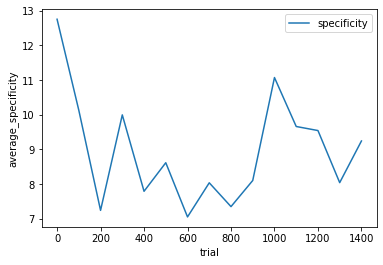

In [6]:
import pandas as pd
import numpy as np

ax = df['average_specificity'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])


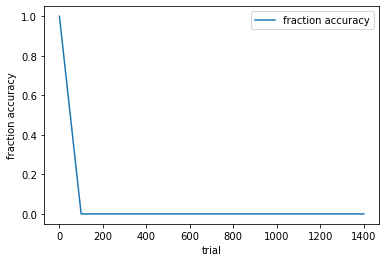

In [7]:
ax = df['fraction_accuracy'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])

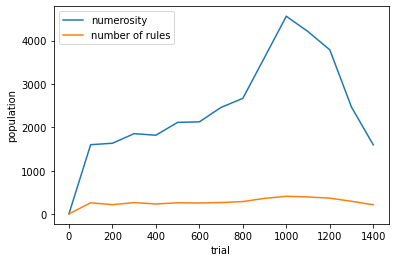

In [8]:
ax = df[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "population"])

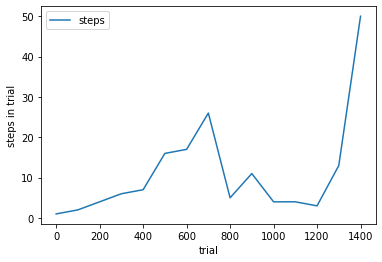

In [9]:
ax = df['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])